In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [44]:
data = pd.read_csv("/web_features_preprocessing_data (1).csv")

In [45]:
data = data.drop(index=0)

In [46]:
X = data.iloc[:, :-1].values  # Özellikler
y = data.iloc[:, -1].values

In [47]:
y = to_categorical(y)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))  # Çıkış katmanı için softmax

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6080 - loss: 0.9137 - val_accuracy: 0.6565 - val_loss: 0.7877
Epoch 2/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6662 - loss: 0.7622 - val_accuracy: 0.6565 - val_loss: 0.7809
Epoch 3/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6708 - loss: 0.7444 - val_accuracy: 0.6620 - val_loss: 0.7688
Epoch 4/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6828 - loss: 0.7238 - val_accuracy: 0.6628 - val_loss: 0.7621
Epoch 5/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6869 - loss: 0.7192 - val_accuracy: 0.6714 - val_loss: 0.7547
Epoch 6/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6873 - loss: 0.7101 - val_accuracy: 0.6668 - val_loss: 0.7575
Epoch 7/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6948 - loss: 0.7047 - val_accuracy: 0.6605 - val_loss: 0.7738
Epoch 8/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6891 - loss: 0.7037 - val_accuracy: 0.

In [24]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Kaybı: {loss}, Test Doğruluğu: {accuracy}")

206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.6672 - loss: 0.9325
Test Kaybı: 0.9262738227844238, Test Doğruluğu: 0.6718369722366333


In [50]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [37]:
y_train_resampled = to_categorical(y_train_resampled)
y_test = to_categorical(y_test)

In [51]:
def build_model(learning_rate=0.001, dropout_rate=0.3):
    model = Sequential()
    model.add(Dense(128, input_dim=X_train_resampled.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(4, activation='softmax'))  # 4 kategori olduğu için çıktı 4 nöron

    # Modelin derlenmesi
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

In [52]:
from tensorflow.keras.layers import Dropout

In [40]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [53]:
print(f"y_train_resampled shape: {y_train_resampled.shape}")
print(f"y_test shape: {y_test.shape}")

y_train_resampled shape: (41780, 4, 2, 2)
y_test shape: (6576, 4)


In [55]:
model = build_model(learning_rate=0.001, dropout_rate=0.3)
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50, batch_size=64, callbacks=[early_stopping])

Epoch 1/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5299 - loss: 1.0255 - val_accuracy: 0.6682 - val_loss: 0.7586
Epoch 2/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6369 - loss: 0.8210 - val_accuracy: 0.6762 - val_loss: 0.7450
Epoch 3/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6465 - loss: 0.8048 - val_accuracy: 0.6776 - val_loss: 0.7338
Epoch 4/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6519 - loss: 0.7946 - val_accuracy: 0.6775 - val_loss: 0.7298
Epoch 5/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6606 - loss: 0.7812 - val_accuracy: 0.6749 - val_loss: 0.7332
Epoch 6/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6508 - loss: 0.7785 - val_accuracy: 0.6810 - val_loss: 0.7295
Epoch 7/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6661 - loss: 0.7681 - val_accuracy: 0.6807 - val_loss: 0.7236
Epoch 8/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6602 - loss: 0.7705 - val_accuracy: 0.

In [56]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Kaybı: {test_loss}, Test Doğruluğu: {test_acc}")

206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7166 - loss: 0.6759
Test Kaybı: 0.6750633716583252, Test Doğruluğu: 0.7118309140205383


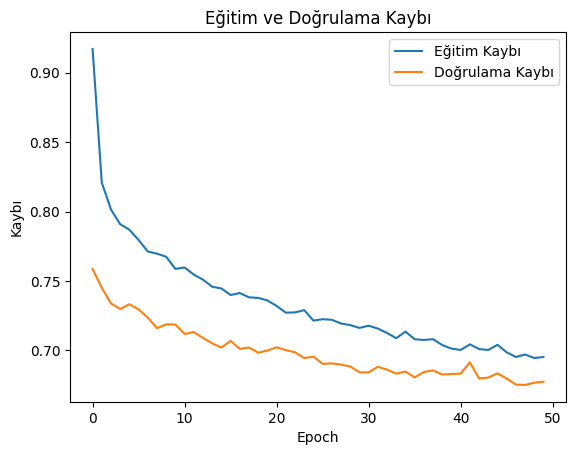

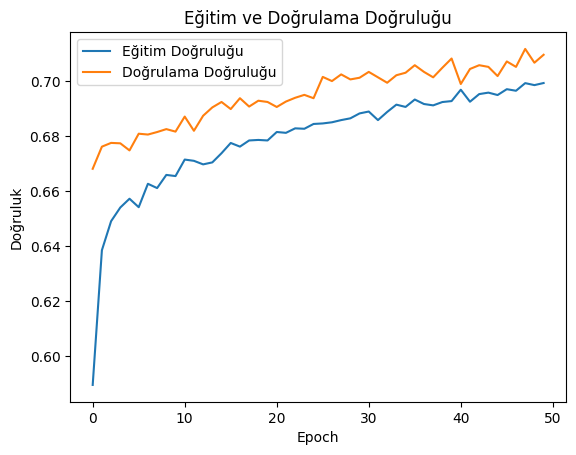

In [57]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama kaybı
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kaybı')
plt.legend()
plt.show()

# Eğitim ve doğrulama doğruluğu
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

In [58]:
model.save('web_site_classification_model.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')